In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns 

In [2]:
iris_data = pd.read_csv("/kaggle/input/iris/Iris.csv",index_col="Id")
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X = iris_data.drop(["Species"],axis=1)
y = iris_data.Species

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=6)

In [4]:
log_reg_model = LogisticRegression(multi_class='ovr', random_state=42)
log_reg_model.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', random_state=42)

Accuracy score: 0.94


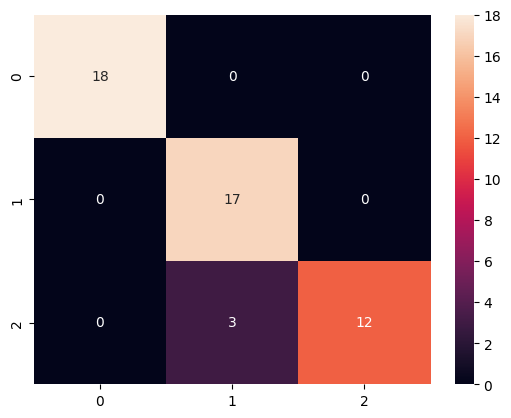

In [5]:
y_pred = log_reg_model.predict(X_test)
y_prob = log_reg_model.predict_proba(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True);

In [6]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.85      1.00      0.92        17
 Iris-virginica       1.00      0.80      0.89        15

       accuracy                           0.94        50
      macro avg       0.95      0.93      0.94        50
   weighted avg       0.95      0.94      0.94        50

